In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine_data.csv',header= None,usecols=[0,1,2])
df.columns = ['Class_label', 'Alcohol', 'Malic_acid']

In [3]:
df.head()

,Class_label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

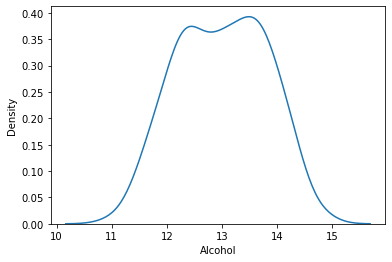

In [4]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic_acid', ylabel='Density'>

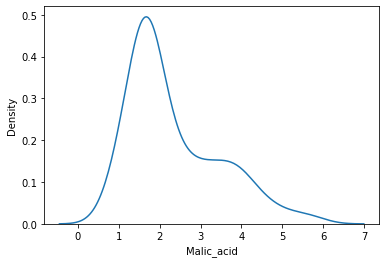

In [5]:
sns.kdeplot(df['Malic_acid'])

C:\Users\Subrat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic_acid'>

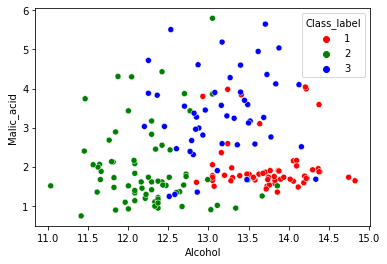

In [6]:
color = {1:'red',2:'green',3:'blue'}
sns.scatterplot(df['Alcohol'],df['Malic_acid'],hue=df['Class_label'],palette=color)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class_label',axis =1),
                                                   df['Class_label'],
                                                   test_size=0.3,
                                                   random_state=0)

In [8]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [9]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

# fit the scaler to the train set,
scale.fit(X_train)

# transform train and test sets
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)

In [10]:
X_train_scale = pd.DataFrame(X_train_scale,columns=X_train.columns)
X_test_scale = pd.DataFrame(X_test_scale,columns=X_test.columns)

In [11]:
np.round(X_train.describe(),1)

,Alcohol,Malic_acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [12]:
np.round(X_train_scale.describe(),1)

,Alcohol,Malic_acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


As we could notice after applying MinMaxScale, minimum and maximum values are scaled down to 0 and 1.

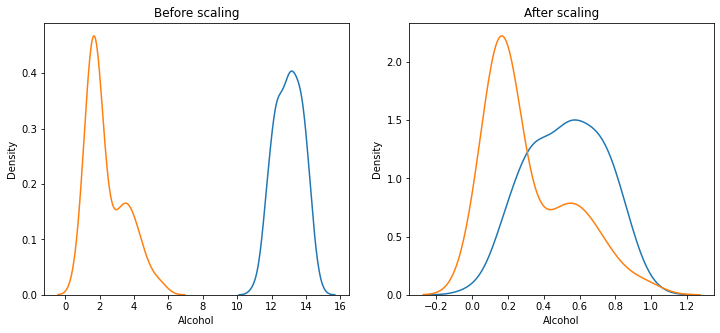

In [13]:
fig,ax = plt.subplots(ncols=2,figsize=(12,5))

ax[0].set_title('Before scaling')
sns.kdeplot(X_train['Alcohol'],ax = ax[0])
sns.kdeplot(X_train['Malic_acid'], ax=ax[0])

ax[1].set_title('After scaling')
sns.kdeplot(X_train_scale['Alcohol'],ax = ax[1])
sns.kdeplot(X_train_scale['Malic_acid'], ax=ax[1])

plt.show()

From the above graph we noticed that MinMaxScale scaled down both the columns values to a fixed range.